In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv') #import file

#remove rows with empty values to avoid errors
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna(axis = 0)#drop rows with empty values
cleaned_data_count = recent_grads.shape[0]

recent_grads.describe() #get basic summary of cleaned data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


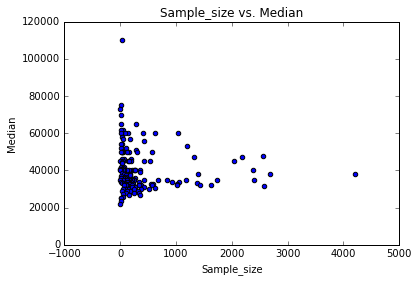

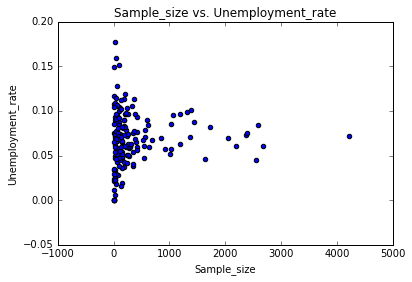

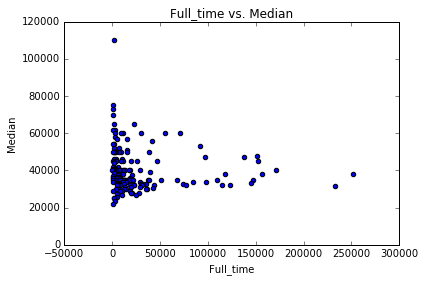

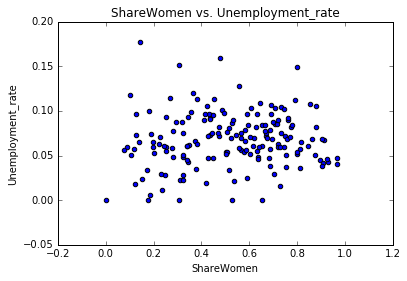

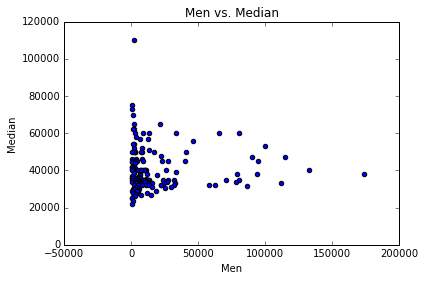

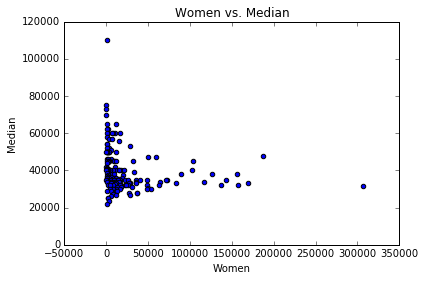

In [28]:
#create scatter plots to examine data for possible relations
sm = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Sample_size vs. Median')

su = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', 
                  title='Sample_size vs. Unemployment_rate')

fm = recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Full_time vs. Median')

swu = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', 
                  title='ShareWomen vs. Unemployment_rate')

mm = recent_grads.plot(x='Men', y='Median', kind='scatter', 
                  title='Men vs. Median')

wmm = recent_grads.plot(x='Women', y='Median', kind='scatter', 
                  title='Women vs. Median')

#### Scatter Plot Analysis
From the sample size and median scatter plot it can be seen that students in more popular majors earn less than those in less popular majors, with some exceptions.

From the men and median, and women and median scatter plots it can be seen that women tend to earn less than their male counterparts.

The full-time vs median scatter plot does not suggest any strong link between the number of full-time employees and earnings as their is a large spread over the different sample sizes.

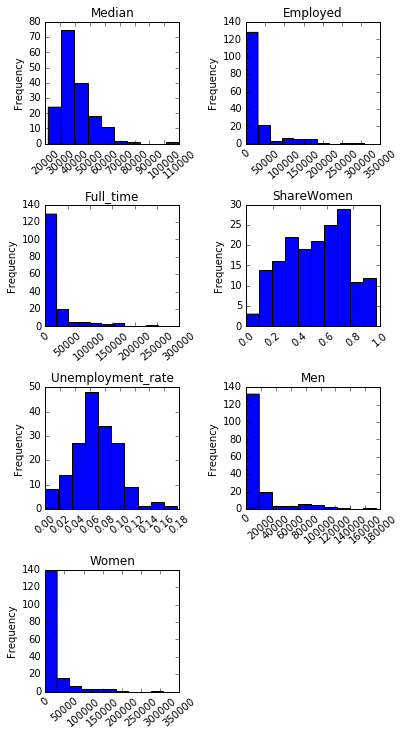

In [36]:
#column names
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
        "Unemployment_rate", "Men", "Women"]

#plot histograms to visualize distribution of data
fig = plt.figure(figsize=(6,12))
for r in range(1,8):
    ax = fig.add_subplot(4,2,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    ax.set_title(cols[r])
    
fig.subplots_adjust(hspace=.5, wspace =.5)

#### Histogram Analysis

From the histogram it can be seen that roughly 30% of majors are predominatly women.

The most common salary amongst all majors appears to be $30 000.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3491972e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc34adb1908>]], dtype=object)

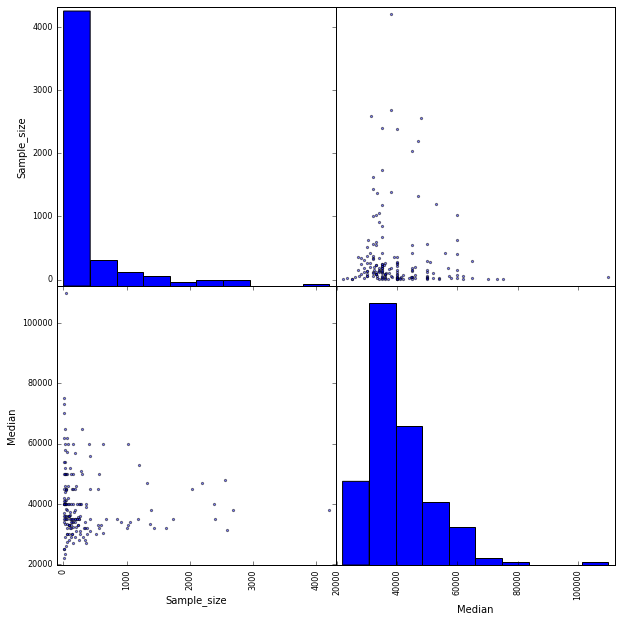

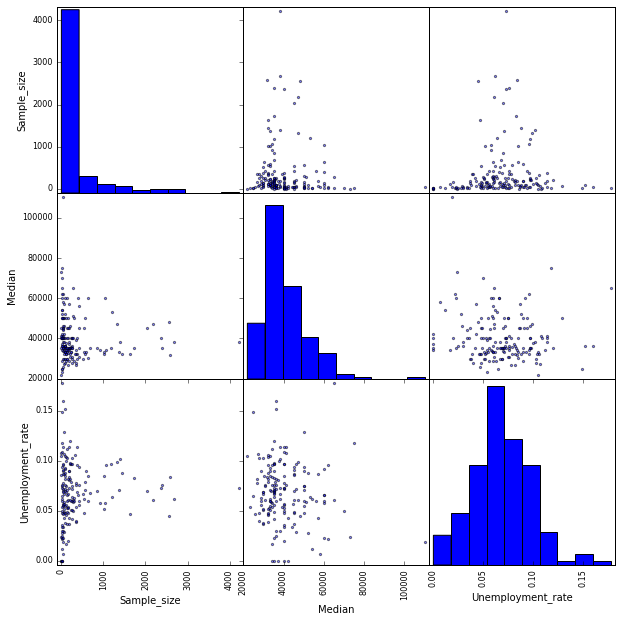

In [40]:
from pandas.tools.plotting import scatter_matrix
#scatter matrix to generate both histograms and scatter plots 
#to further examine relatinoships in data
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']]
               , figsize=(10,10))


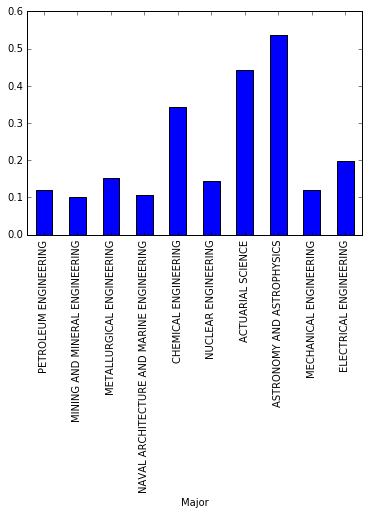

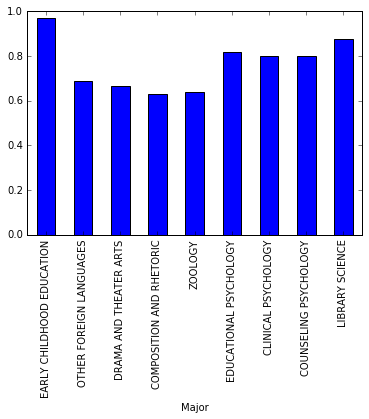

In [42]:
#bar plots to examine percentage of women in the highest and lowest paying jobs
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)